## 字元切割
使用 OpenCV 切割出各個字母

In [2]:
import cv2
import matplotlib.pyplot as plt
import requests
import urllib3
from PIL import Image
import io
import numpy as np

%matplotlib inline
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

captcha_url = 'https://webap.nkust.edu.tw/nkust/validateCode.jsp'

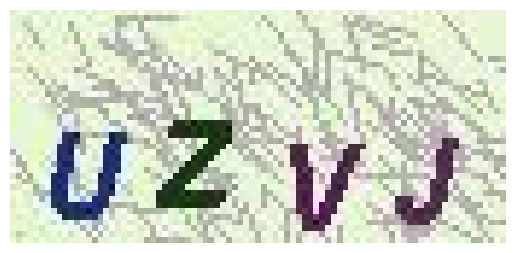

In [3]:
# 爬取驗證圖片
response = requests.get(captcha_url, verify=False)
img = np.array(Image.open(io.BytesIO(response.content)))

plt.axis('off')
plt.imshow(img)

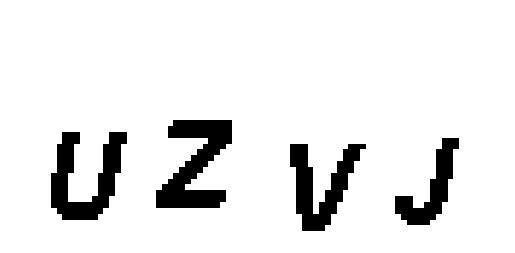

In [4]:
# 使用openCV將圖片二值化
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img_gray = cv2.threshold(img_gray, 132, 255, cv2.THRESH_BINARY)

# 去除躁點
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
img_final = cv2.erode(img_gray, kernel)

plt.axis('off')
plt.imshow(img_final, cmap='gray')

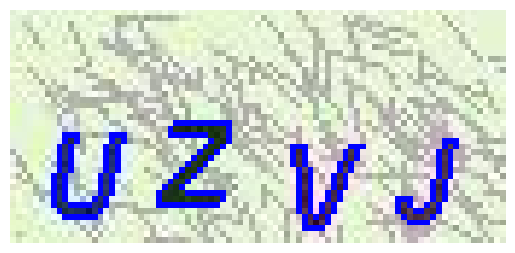

In [5]:
img_final = cv2.bitwise_not(img_final)  # findContours的黑色是背景, 所以需反向
contours, hierarchy = cv2.findContours(img_final, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_copy = img.copy()
cv2.drawContours(img_copy, contours, -1, (0,0,255))

plt.axis('off')
plt.imshow(img_copy, cmap='gray')

(48, 23, 13, 15)
(66, 22, 11, 15)
(7, 21, 13, 15)
(25, 19, 13, 15)


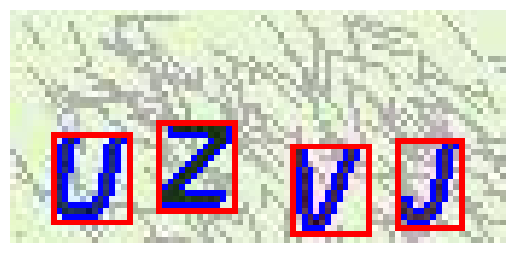

In [6]:
results = [] # 切割後的結果

for item in contours:
    rect = cv2.boundingRect(item)
    x, y, w, h = rect
    results.append([x, img_final[y:y+h, x:x+w]])

    print(rect)
    cv2.rectangle(img_copy,(x,y),(x+w,y+h),(255,0,0))

plt.axis('off')
plt.imshow(img_copy)

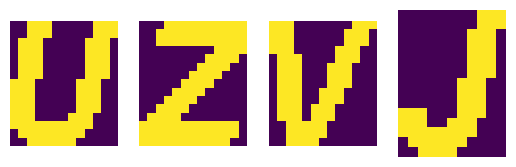

In [7]:
results = sorted(results, key=lambda x: x[0])  # 重新排序
# size = max([x[1].shape for x in results])    # 取得最大的圖片大小

input_img = [0]*4

for i, item in enumerate(results):
    # Image.fromarray(item[1]).save(f"./images/tmp/0tmp_{i}.bmp")  # 圖片存檔
    input_img[i] = item[1]

    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(item[1])

## 字元辨識
將圖片大小補至30×30，並靠右上對齊。
接著用歐式距離來計算相似度。

In [8]:
import glob

In [9]:
datas_path = glob.glob("./images/bmp/*.bmp")
data = [cv2.imread(x)[:,:,0] for x in datas_path]

In [10]:
key = "123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
ans = ''

for a in input_img:
    score = [0]* (9 + 26) # 0~9 + A~Z（因為 O 與 0 容易搞混，所以沒有 0）
    for i, b in enumerate(data):
        a = cv2.copyMakeBorder(a, 0, 30-a.shape[0], 0, 30-a.shape[1], cv2.BORDER_CONSTANT, 0)
        b = cv2.copyMakeBorder(b, 0, 30-b.shape[0], 0, 30-b.shape[1], cv2.BORDER_CONSTANT, 0)
        score[i] = sum(np.sqrt(sum(pow(a - b,2))))

    print(*zip(key,score), sep='\n')
    print("="*20)
    ans += key[np.argmin(score)]

('1', 38.36328125)
('2', 34.755859375)
('3', 33.19921875)
('4', 33.05859375)
('5', 30.44140625)
('6', 28.23828125)
('7', 38.52734375)
('8', 29.806640625)
('9', 31.111328125)
('A', 41.1171875)
('B', 31.97265625)
('C', 25.974609375)
('D', 34.349609375)
('E', 29.57421875)
('F', 32.111328125)
('G', 30.529296875)
('H', 33.4453125)
('I', 31.474609375)
('J', 31.599609375)
('K', 34.533203125)
('L', 26.9765625)
('M', 46.1875)
('N', 35.9375)
('O', 31.57421875)
('P', 32.765625)
('Q', 33.236328125)
('R', 36.029296875)
('S', 30.376953125)
('T', 38.630859375)
('U', 0.0)
('V', 26.953125)
('W', 45.888671875)
('X', 40.580078125)
('Y', 33.986328125)
('Z', 34.19921875)
('1', 34.701171875)
('2', 21.484375)
('3', 29.00390625)
('4', 36.263671875)
('5', 33.115234375)
('6', 35.93359375)
('7', 32.041015625)
('8', 33.65234375)
('9', 31.994140625)
('A', 36.001953125)
('B', 25.74609375)
('C', 32.216796875)
('D', 31.8125)
('E', 24.31640625)
('F', 29.11328125)
('G', 34.234375)
('H', 33.82421875)
('I', 34.267578125)

Answer: UZVJ


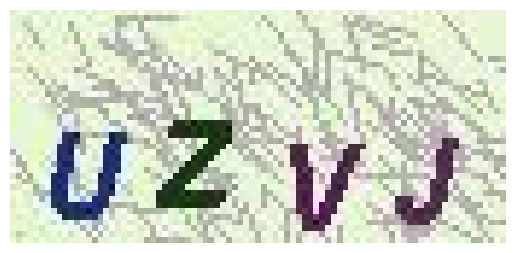

In [11]:
print("Answer:", ans)
plt.axis('off')
plt.imshow(img)